In [1]:
import datetime as dt
dt_1 = dt.datetime.today()
dt_2 = dt.datetime.now()
print(dt_1)
print(dt_2)

2023-03-12 21:02:50.810338
2023-03-12 21:02:50.810338


In [5]:
import pandas as pd
import seaborn as sns
import numpy as np

In [7]:
ds =sns.load_dataset("penguins")

In [8]:
display(ds.shape)
display(ds.head())

(344, 7)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## ds.isna().any()

In [9]:
ds.isna().any() # Here False means no Missing value And True means have missing value. 

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [6]:
ds.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [11]:
# WE can apply mean / median in DataType -> Float / Int.
# WE can apply mode in DataType -> object type .    

In [12]:
ds["bill_length_mm"] = ds["bill_length_mm"].fillna(ds["bill_length_mm"].mean())

ds["bill_depth_mm"] = ds["bill_depth_mm"].fillna(ds["bill_depth_mm"].median())

ds["flipper_length_mm"] = ds["flipper_length_mm"].fillna(ds["flipper_length_mm"].median())

ds["body_mass_g"] = ds["body_mass_g"].fillna(ds["body_mass_g"].mean())

In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [14]:
ds["sex"] = ds['sex'].fillna(ds["sex"].value_counts().index[0])

In [15]:
ds["sex"].value_counts()

Male      179
Female    165
Name: sex, dtype: int64

In [16]:
ds.isna().any()

species              False
island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [17]:
ds.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [18]:
#  NOW ALL MISSING DATA HANDLE.....

## Outlier


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
dt = pd.read_csv("Data_set/data.csv" , header = 0)
dt

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


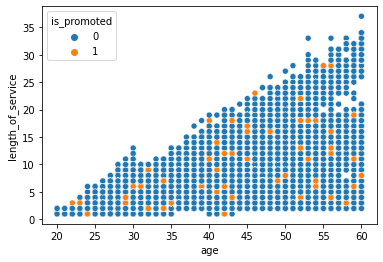

In [28]:
sns.scatterplot(x="age" , y = "length_of_service" , data = dt , hue= "is_promoted")
plt.show()

[Text(0.5, 1.0, 'LENGTH OF SERVICE')]

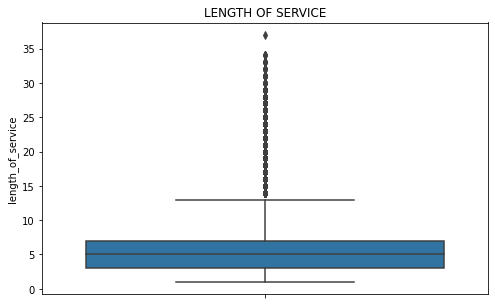

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(y="length_of_service" , data = dt).set(title ="LENGTH OF SERVICE")

Above 15 all the points is comes under outlier

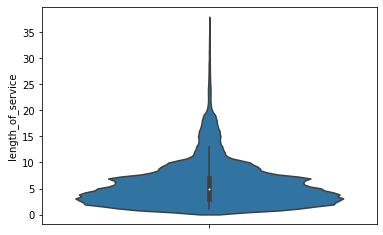

In [41]:
sns.violinplot(y="length_of_service" , data =  dt)
plt.show()

More is peek means more is the outlier

In [47]:
q1 = dt.length_of_service.quantile(0.25) #  3
q2=  dt.length_of_service.quantile(0.75) #  7
IQR = q2-q1    # 4
lower_limit = q1 - 1.5*(IQR)
upper_limit = q2 + 1.5*(IQR)
data_outlier = dt[(dt.length_of_service < lower_limit) | (dt.length_of_service > upper_limit)]
display(data_outlier)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
13,38401,Technology,region_29,Master's & above,m,other,2,39,3.0,16,0,0,80,0
42,23560,HR,region_2,Bachelor's,m,sourcing,1,59,4.0,26,1,0,52,0
60,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,1,0,47,1
74,77577,Sales & Marketing,region_7,Bachelor's,m,other,1,50,3.0,14,0,0,52,0
99,51256,Finance,region_2,Master's & above,m,other,1,60,5.0,17,0,0,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54691,4210,Analytics,region_2,Master's & above,m,sourcing,1,47,5.0,19,0,0,86,0
54695,41348,Operations,region_2,Bachelor's,f,other,2,52,5.0,18,1,0,56,1
54697,10636,Sales & Marketing,region_2,Bachelor's,m,sourcing,1,47,5.0,15,0,0,50,0
54754,45697,Technology,region_26,Bachelor's,f,other,1,42,3.0,14,0,0,79,0


<AxesSubplot:ylabel='length_of_service'>

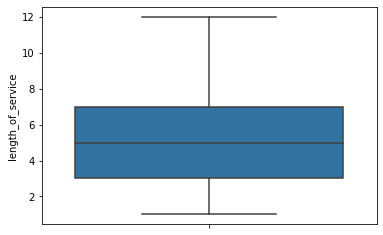

In [53]:
dt1 = dt[(dt.length_of_service > lower_limit) & (dt.length_of_service < upper_limit)]
dt1
sns.boxplot( y = dt1["length_of_service"] , data = dt1)

Here Outlier is dismantle

<AxesSubplot:ylabel='length_of_service'>

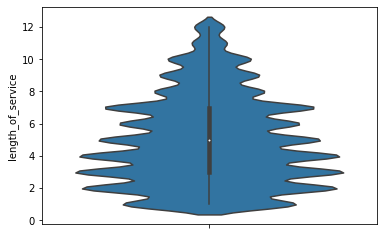

In [54]:
sns.violinplot( y = dt1["length_of_service"] , data = dt1)